## Allsides Web scraper in Graphs/Tabels

This is my first ever web scraper that I have worked countless hours to perfect. The data I collected consisted of news source, where they fall in the political specturm, and if people agree if where they fall on the specturm is true. As the United States 2020 election is coming up this data is perfect for anyone looking for a news source to follow. 

In [134]:
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np

## Data in a table:

The first 5 from the json file.

In [135]:
df = pd.read_json(open('all-sides.json', 'r'))
df.set_index('News Source')
df.head()

,News Source,AllSides Bias Rating,News Media Info,Agree,Disagree,Ratio,Community feedback,News Source Site,Established,Owned by
0,ABC News (Online),left-center,https://www.allsides.com/news-source/abc-news-...,24373,13717,1.777,Agree,http://abcnews.go.com/,6/15/1945,The Walt Disney Company
1,AlterNet,left,https://www.allsides.com/news-source/alternet-...,8547,1880,4.546,Absolutely agree,http://www.alternet.org/,,Independent Media Institute
2,Associated Press,center,https://www.allsides.com/news-source/associate...,16659,12341,1.350,Somewhat agree,https://apnews.com/,1846,"Cooperatively owned by 1,500 member news outlets"
3,BBC News,center,https://www.allsides.com/news-source/bbc-news-...,20374,18314,1.112,Somewhat agree,http://www.bbc.com/,10/18/1922,British Public
4,Bloomberg,left-center,https://www.allsides.com/news-source/bloomberg...,11155,17016,0.656,Disagree,http://www.bloomberg.com/,1990,Bloomberg LP (Michael Bloomberg CEO)


In [136]:
plt.style.use('fivethirtyeight') # the style of the graph 

## Data in a bar graph:
Here is an example of what you can do with the agree and disagree values collected.

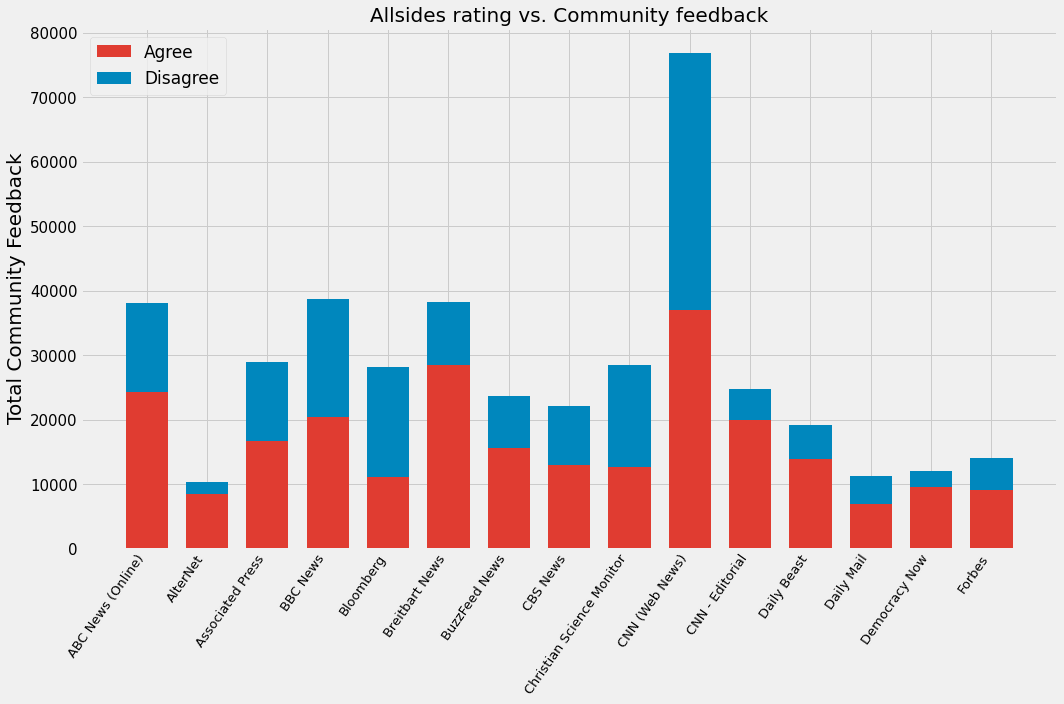

In [295]:
df2 = df.head(15).copy() # copys the first 15 from data.

fg, ax = plt.subplots(figsize=(15,10))

news_source = df2['News Source']
news_source = np.arange(len(news_source))
width = 0.7

plt.bar(news_source, df2['Agree'],
        color='#E03C31', width=width, label='Agree')
plt.bar(news_source, df2['Disagree'],
        color='#0087BD', width=width, bottom=df2['Agree'], label='Disagree')

plt.xticks(ticks=news_source, labels=df2['News Source'], rotation=55, ha='right', fontsize="13")
plt.yticks(fontsize="15")

plt.legend(loc='upper left', fontsize=17)
plt.title('Allsides rating vs. Community feedback', fontsize=20)
plt.ylabel('Total Community Feedback', fontsize=20)
plt.tight_layout()
plt.grid(True)
plt.show()  # To make the plot appear


## Data in a Pie Chart:
Here is an example of what you can do with the agree and disagree values for a specific news source plotted in a pie chart.

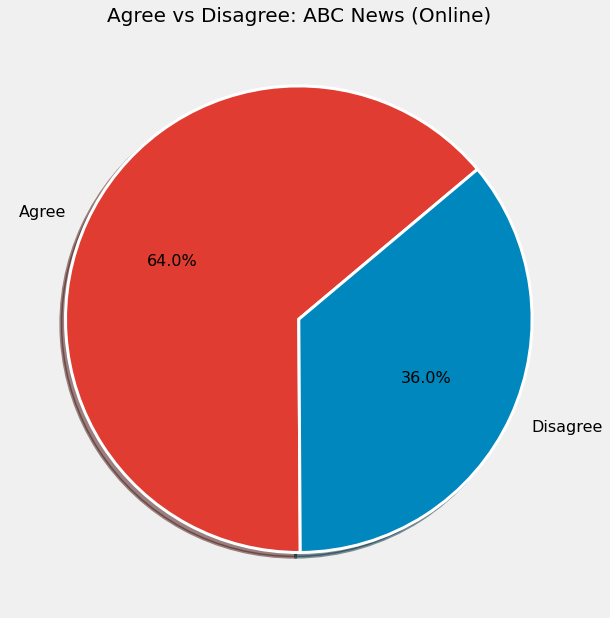

In [138]:
df4 = df.copy()

plt.figure(figsize=(15,10))


news_title = df4['News Source'][0]

agree = df4['Agree'].unique()[0]
disagree = df4['Disagree'].unique()[0]

slices = [agree, disagree]
colors =['#E03C31','#0087BD']
labels =['Agree', 'Disagree']

plt.pie(slices, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', 
        textprops={'color': 'black', 'fontsize': '16'}, startangle=40, wedgeprops={'edgecolor': 'white', 'linewidth': '3'})


plt.title('Agree vs Disagree' + ': ' + news_title, fontsize=20)
plt.show()  # To make the plot appear

## Data in a bar graph - Bias:
Here is an example of what you can do with the agree and disagree values for news sources that fall under a specific side of the political spectrum. 

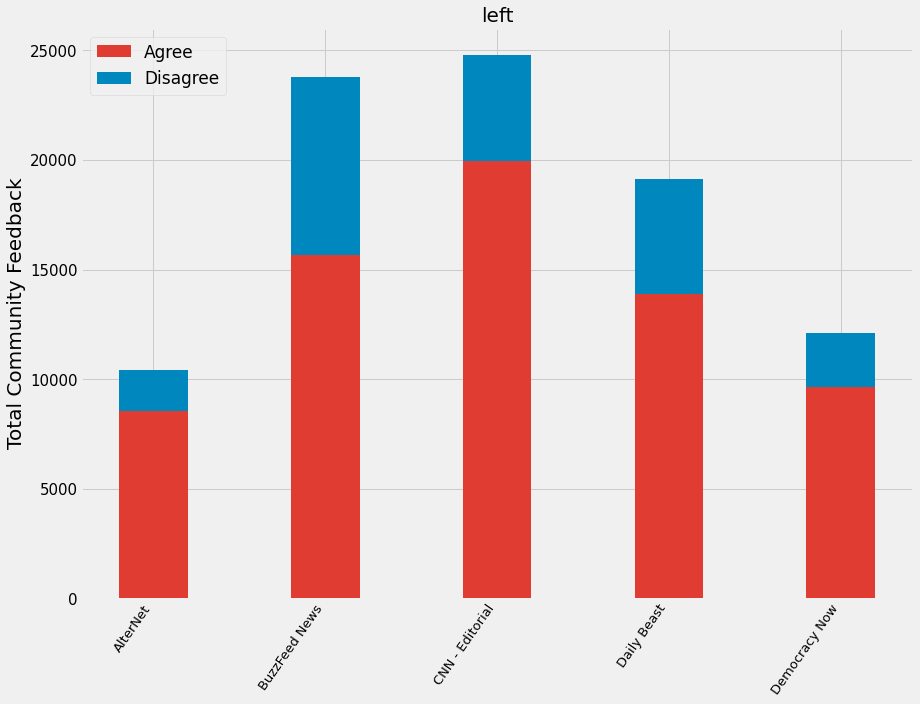

In [423]:
df3 = df.head(15).copy()  # copys the first 15 from data.

fg, ax = plt.subplots(figsize=(13, 10))

df3['agree'] = df3[df3['AllSides Bias Rating'] == 'left']['Agree']
df3['disagree'] = df3[df3['AllSides Bias Rating'] == 'left']['Disagree']
df3['news'] = df3[df3['AllSides Bias Rating'] == 'left']['News Source'].reset_index(drop=True)

news_source = np.arange(len(df3['news'].dropna()))
width = 0.4

plt.bar(news_source, df3['agree'].reset_index(drop=True).dropna(), color='#E03C31', width=width, label='Agree')
plt.bar(news_source, df3['disagree'].dropna().reset_index(drop=True), color='#0087BD', bottom = df3['agree'].reset_index(drop=True).dropna(), width=width, label='Disagree')

plt.xticks(ticks=news_source, labels=df3['news'].dropna(), rotation=55, ha='right', fontsize="13")
plt.yticks(fontsize="15")

plt.legend(loc='upper left', fontsize=17)
plt.title('left', fontsize=20)
plt.ylabel('Total Community Feedback', fontsize=20)
plt.tight_layout()
plt.show()  # To make the plot appear
